In [1]:
#### Import necessary modules and load data set###
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


# Load dataseet
iris = datasets.load_iris()
X_original = iris.data  
scaler = StandardScaler().fit(X_original)
X = scaler.transform(X_original)
y = iris.target

In [2]:
## First try testing a model using holdout method

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) 
#Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable

n_neighbors = 6

# build KNN model and choose n_neighbors based on cross-validation
knn = KNeighborsClassifier(n_neighbors)

# train the model on training set
knn.fit(X_train, y_train)

# test the model on test set
y_pred = knn.predict(X_test)

# print the accuracy score
print('Holdout accuracy: ', accuracy_score(y_test, y_pred))
print('\n')
print('Classification report: ')
print(classification_report(y_test, y_pred))
print('Confusion report: ')
print(confusion_matrix(y_test, y_pred))

Holdout accuracy:  0.9777777777777777


Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion report: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [3]:
## Second try testing a model using cross-validation

#build new model
knn_cv = KNeighborsClassifier(n_neighbors)

# X,y will automatically devided by 5 folder, using accuracy as scoring. 
#train new model with cv of 5, training on entire set X,y
scores = cross_val_score(knn_cv, X, y, cv=5, scoring='accuracy')
predictions = cross_val_predict(knn_cv, X, y, cv=5)

# print all 5 times scores 
print('All scores:' )
print(scores)

# then I will do the average about these five scores to get more accuracy score.
# print the accuracy score
print('Cross-Validated accuracy: ', scores.mean())
print('\n')
print('Classification report: ')
print(classification_report(y, predictions))
print('Confusion report: ')
print(confusion_matrix(y, predictions))

All scores:
[0.96666667 0.96666667 1.         0.9        1.        ]
Cross-Validated accuracy:  0.9666666666666668


Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.98      0.95        50
           2       0.98      0.92      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Confusion report: 
[[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]


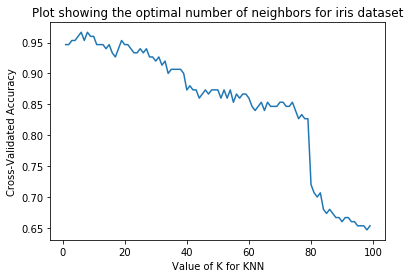

Maximal accuracy:  0.9666666666666668
Optimal number of neighbours:  6


In [4]:
## Test for optimal number of neigbours, based on cross-validated accuracy

%matplotlib inline
# choose k between 1 to 30
k_range = range(1, 100)
k_scores = []
ks = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    ks.append(k)
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Plot showing the optimal number of neighbors for iris dataset')
plt.show()

print('Maximal accuracy: ', max(k_scores)) ##Same as above
print('Optimal number of neighbours: ', k_scores.index(max(k_scores))+1)


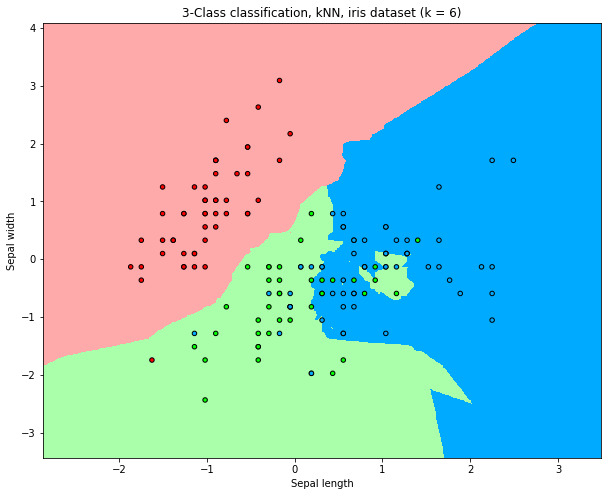

In [5]:
## Plot the decision boundaries for the first two features

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# build model and train the model
#knn = KNeighborsClassifier(n_neighbors, weights = 'distance')
#knn.fit(X_train, y_train)
h = .01  # step size in the mesh

# calculate min, max and limits (x_min=length, y_min=width)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# build model with only two features to plot
knn_2d = KNeighborsClassifier(n_neighbors)
knn_2d.fit(X_train[:, :2], y_train)

# get the predict values
y_pred_2d = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred_2d = y_pred_2d.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))

plt.pcolormesh(xx, yy, y_pred_2d, cmap=cmap_light)

#Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# set a title and labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("3-Class classification, kNN, iris dataset (k = %i)" % (n_neighbors))
plt.show()

Text(0, 0.5, 'Feature characteristic')

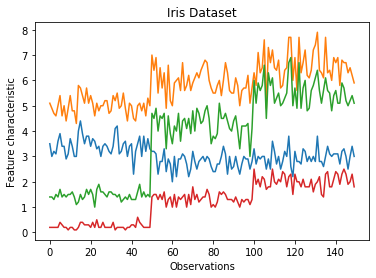

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

dataframe=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

# create a figure and axis
fig, ax = plt.subplots()
x_data=range(0,150)
ax.plot(x_data, dataframe['sepal width'])
ax.plot(x_data, dataframe['sepal length'])
ax.plot(x_data, dataframe['petal length'])
ax.plot(x_data, dataframe['petal width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('Observations')
ax.set_ylabel('Feature characteristic')